# Coding Block 4 - Automated model and hyperparameter tuning with AutoGluon

### Load the packages

In [1]:
#!pip install autogluon.tabular  > /dev/null 2>&1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# AutoML
from autogluon.tabular import TabularPredictor
'''
...
'''

/Users/chrisoesterreich/Developement/anaconda3/envs/donnerstag/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\n...\n'

### Read the dataset 
You can also compare processed and non-processed data. The autogluon library will do some preprocessing as well.

In [4]:
df = pd.read_csv('../data/df_imputed_clean.csv')
df = df.drop(columns=['Mahalanobis_Distance', 'Multivariate_Outlier', 'Outlier', 'Unnamed: 0'])

### Use the Autogluon library
Use the library autogluon for automated hyperparametertuning and model benchmarking. The fit function of the TabularPredictor object allows for setting the option: <br>
<i>presets = {‘best_quality’, ‘high_quality’, ‘good_quality’, ‘medium_quality’, ‘experimental_quality’, ‘optimize_for_deployment’, ‘interpretable’, ‘ignore_text’}</i> <br>

medium_quality can limit the depths of hyperparameter optimization..

No path specified. Models will be saved in: "AutogluonModels/ag-20250320_133056"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       4.05 GB / 16.00 GB (25.3%)
Disk Space Avail:   15.03 GB / 460.43 GB (3.3%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "/Users/chrisoesterreich/Desktop/AppliedAnalytics/Applied-Analytics/04_Thursday/AutogluonModels/ag-20250320_133056"
Train Data Rows:    583
Train Data Columns: 8
Label Column:       Outcome
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1.0, 0.0]
	If 'binary' is not the correct problem_type, please manually 

                  model  score_test  score_val eval_metric  pred_time_test  \
0               XGBoost    0.760274   0.794872    accuracy        0.004179   
1            LightGBMXT    0.746575   0.794872    accuracy        0.000951   
2   WeightedEnsemble_L2    0.746575   0.794872    accuracy        0.002209   
3        ExtraTreesGini    0.739726   0.760684    accuracy        0.034270   
4      RandomForestGini    0.732877   0.760684    accuracy        0.030221   
5        ExtraTreesEntr    0.732877   0.726496    accuracy        0.032540   
6      RandomForestEntr    0.726027   0.760684    accuracy        0.031669   
7        KNeighborsUnif    0.712329   0.786325    accuracy        0.016160   
8         LightGBMLarge    0.705479   0.769231    accuracy        0.003820   
9        KNeighborsDist    0.705479   0.786325    accuracy        0.014689   
10             LightGBM    0.657534   0.794872    accuracy        0.005811   

    pred_time_val  fit_time  pred_time_test_marginal  pred_time

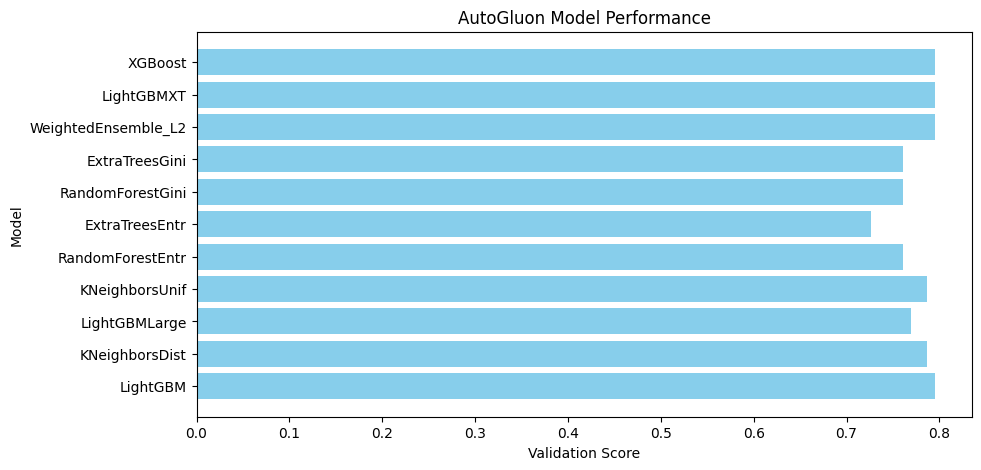

    Outcome  Predicted
1       0.0        0.0
4       0.0        0.0
13      1.0        0.0
14      0.0        0.0
20      1.0        1.0


In [5]:
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df is a Pandas DataFrame
if not isinstance(df, pd.DataFrame):
    raise ValueError("df must be a pandas DataFrame")

# Define the target variable
TARGET = 'Outcome'  # Modify this if your target column is named differently

# Split data into train and test sets
test_fraction = 0.2
df_train = df.sample(frac=(1 - test_fraction), random_state=42)
df_test = df.drop(df_train.index)

# Initialize and train AutoGluon
predictor = TabularPredictor(label=TARGET).fit(df_train, presets='medium_quality')

# Evaluate the model
leaderboard = predictor.leaderboard(df_test, silent=True)
print(leaderboard)

# Plot model performance
plt.figure(figsize=(10, 5))
plt.barh(leaderboard['model'], leaderboard['score_val'], color='skyblue')
plt.xlabel('Validation Score')
plt.ylabel('Model')
plt.title('AutoGluon Model Performance')
plt.gca().invert_yaxis()
plt.show()

# Make predictions
y_pred = predictor.predict(df_test.drop(columns=[TARGET]))

# Display first few predictions
predictions = df_test[[TARGET]].copy()
predictions['Predicted'] = y_pred
print(predictions.head())


### Show the leaderboard
TabularPredictor objects from Autogluon provide a function "leaderboard"

### Show the feature importance table
The TabularPredictor class from Autogluon also provides a function "feature_importance"

Computing feature importance via permutation shuffling for 8 features using 583 rows with 5 shuffle sets...
	0.17s	= Expected runtime (0.03s per shuffle set)
	0.04s	= Actual runtime (Completed 5 of 5 shuffle sets)


                          importance    stddev   p_value  n  p99_high  \
Glucose                     0.115266  0.009028  0.000004  5  0.133854   
Age                         0.018525  0.002544  0.000042  5  0.023763   
SkinThickness               0.018182  0.006486  0.001653  5  0.031537   
BMI                         0.013379  0.006113  0.004039  5  0.025965   
DiabetesPedigreeFunction    0.012693  0.004942  0.002277  5  0.022868   
Insulin                     0.012007  0.004697  0.002318  5  0.021679   
Pregnancies                 0.007890  0.003116  0.002398  5  0.014306   
BloodPressure               0.002401  0.002301  0.039980  5  0.007140   

                           p99_low  
Glucose                   0.096678  
Age                       0.013286  
SkinThickness             0.004826  
BMI                       0.000793  
DiabetesPedigreeFunction  0.002518  
Insulin                   0.002335  
Pregnancies               0.001474  
BloodPressure            -0.002337  


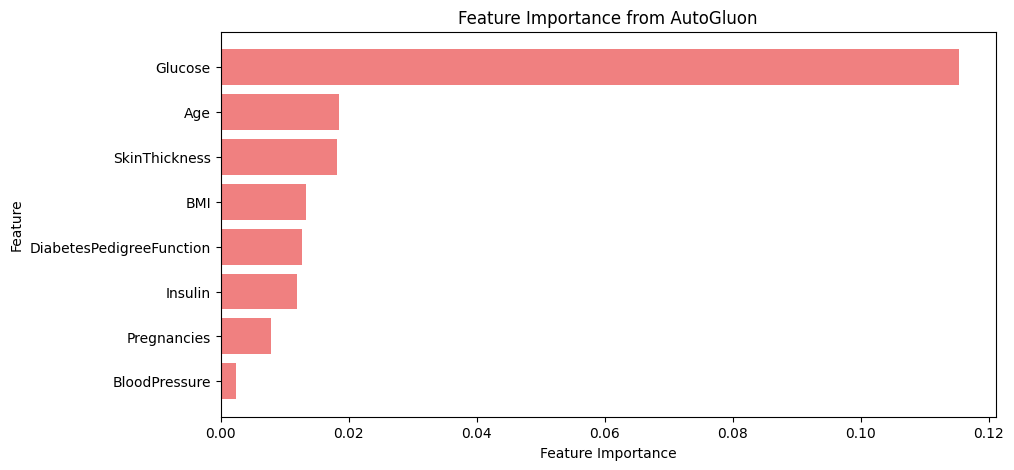

    Outcome  Predicted
1       0.0        0.0
4       0.0        0.0
13      1.0        0.0
14      0.0        0.0
20      1.0        1.0


In [6]:
# Show feature importance
feature_importance = predictor.feature_importance(df_train)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance.index, feature_importance['importance'], color='lightcoral')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from AutoGluon')
plt.gca().invert_yaxis()
plt.show()

# Make predictions
y_pred = predictor.predict(df_test.drop(columns=[TARGET]))

# Display first few predictions
predictions = df_test[[TARGET]].copy()
predictions['Predicted'] = y_pred
print(predictions.head())